In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Files are read, columns are renamed, additional column with source name is added

In [2]:
list_of_all_files = ['bbchealth.txt','cbchealth.txt', 'cnnhealth.txt', 'everydayhealth.txt',
                     'foxnewshealth.txt','gdnhealthcare.txt', 'goodhealth.txt', 'KaiserHealthNews.txt',
                     'latimeshealth.txt','msnhealthnews.txt', 'NBChealth.txt', 'nprhealth.txt',
                     'nytimeshealth.txt','reuters_health.txt', 'usnewshealth.txt', 'wsjhealth.txt']
df_lists = []

In [3]:
for filename in list_of_all_files:
    #print(filename)
    DataFileName = filename.split('.', 1)[0]
    #print(DataFileName)
    DataFrame = pd.read_csv(filename, delimiter='|', error_bad_lines=False, warn_bad_lines=False, header=None)
    DataFrame.rename(columns = {0:'Number', 1:'Date_Time',2:'info'}, inplace = True)
    DataFrame['source'] = pd.Series([DataFileName for x in range(len(DataFrame.index))])
    df_lists.append(DataFrame)
print('Reading all files is done !')

Reading all files is done !


### Merging files

In [4]:
twitter_health = pd.concat(df_lists, axis=0)

In [5]:
twitter_health

,Number,Date_Time,info,source
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...
3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [6]:
twitter_health['source'].value_counts()

goodhealth          7708
nytimeshealth       5947
nprhealth           4837
reuters_health      4719
NBChealth           4215
latimeshealth       4171
cnnhealth           4045
bbchealth           3929
cbchealth           3728
KaiserHealthNews    3508
everydayhealth      3239
wsjhealth           3200
msnhealthnews       3199
gdnhealthcare       2977
foxnewshealth       2000
usnewshealth        1395
Name: source, dtype: int64

In [7]:
for file in df_lists:
    print('File name:', file['source'].unique(), len(file))

File name: ['bbchealth'] 3929
File name: ['cbchealth'] 3728
File name: ['cnnhealth'] 4045
File name: ['everydayhealth'] 3239
File name: ['foxnewshealth'] 2000
File name: ['gdnhealthcare'] 2977
File name: ['goodhealth'] 7708
File name: ['KaiserHealthNews'] 3508
File name: ['latimeshealth'] 4171
File name: ['msnhealthnews'] 3199
File name: ['NBChealth'] 4215
File name: ['nprhealth'] 4837
File name: ['nytimeshealth'] 5947
File name: ['reuters_health'] 4719
File name: ['usnewshealth'] 1395
File name: ['wsjhealth'] 3200


### Reseting index

In [8]:
twitter_health=twitter_health.reset_index()

In [9]:
twitter_health

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


### "info" column can be splitted on "http" due to the fact that core text is on the beginning of the cell and the info after are redundant and unuseful, however there are 119 rows of the "info column which start with "http" and we need to take care of them first in order not to lose data from this 119 rows

### File comprised from the 119 rows which start with "http" in the "info" column is the following:

In [10]:
#df[df["lot"].str.startswith("A-0")]
split_exceptions = twitter_health[twitter_health['info'].str.startswith("http")]
split_exceptions

,index,Number,Date_Time,info,source
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth
...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth


In [11]:
rows_to_skip = split_exceptions.index
rows_to_skip

Int64Index([19543, 25536, 25683, 26351, 26353, 26367, 26415, 26439, 26444,
            26446,
            ...
            54888, 55210, 55674, 59848, 59956, 59957, 60379, 60394, 60465,
            62206],
           dtype='int64', length=119)

### File without the 119 rows which start with "http" in the "info" column is the following:

In [12]:
file_to_split = twitter_health.drop((rows_to_skip), axis=0)
file_to_split

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [13]:
62817 - 119

62698

In [14]:
file_to_split_check =  file_to_split[file_to_split['info'].str.startswith("http")]
file_to_split_check

,index,Number,Date_Time,info,source


### Dataframe status 

In [15]:
#rows which start with 'http:'' excluded - 119 rows excluded
file_to_split

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [16]:
#rows which begin with http: to be excluded from file splitting below
split_exceptions

,index,Number,Date_Time,info,source
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth
...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth


## Dealing with the 119 rows with "http" on the beginning

In [17]:
split_exceptions['info']

19543                             http://gu.com/p/438n2/tw
25536    http://pinterest.com/pin/34832597089912501/ Br...
25683    http://pinterest.com/pin/34832597089793116/ We...
26351    http://pinterest.com/pin/34832597088302332/ 7 ...
26353    http://pinterest.com/pin/34832597088298094/ 5 ...
                               ...                        
59957    http://HealthCare.gov Expected to Work Better ...
60379    http://HealthCare.gov Shortens Insurance Appli...
60394    http://HealthCare.gov Testing to Be Confidenti...
60465    http://HealthCare.gov Delays Web Host Switch h...
62206    http://HealthCare.Gov Plans Deadline Leeway ht...
Name: info, Length: 119, dtype: object

### splitting column "info" from dataset "split_exeptions" by delimiter ' '

In [18]:
split_exceptions_splitted = split_exceptions['info'].str.split(" ", n=1, expand=True)

In [19]:
split_exceptions_splitted.rename(columns = {0:'redundant_info', 1:'Core_info'}, inplace = True)
split_exceptions_splitted

,redundant_info,Core_info
19543,http://gu.com/p/438n2/tw,None
25536,http://pinterest.com/pin/34832597089912501/,Brooke Burke Charvet: 8 Things You Should Know...
25683,http://pinterest.com/pin/34832597089793116/,Weight Loss Tip: Peel Off Pudge With Pepper
26351,http://pinterest.com/pin/34832597088302332/,7 Foods That Help You Shed Pounds
26353,http://pinterest.com/pin/34832597088298094/,5 Healthy Cinco de Mayo Recipes
...,...,...
59957,http://HealthCare.gov,Expected to Work Better This Year http://on.ws...
60379,http://HealthCare.gov,Shortens Insurance Application http://on.wsj.c...
60394,http://HealthCare.gov,Testing to Be Confidential http://on.wsj.com/1...
60465,http://HealthCare.gov,Delays Web Host Switch http://on.wsj.com/1rKuiWc


In [20]:
split_exceptions_splitted = split_exceptions_splitted.drop(['redundant_info'], axis=1)
split_exceptions_splitted

,Core_info
19543,None
25536,Brooke Burke Charvet: 8 Things You Should Know...
25683,Weight Loss Tip: Peel Off Pudge With Pepper
26351,7 Foods That Help You Shed Pounds
26353,5 Healthy Cinco de Mayo Recipes
...,...
59957,Expected to Work Better This Year http://on.ws...
60379,Shortens Insurance Application http://on.wsj.c...
60394,Testing to Be Confidential http://on.wsj.com/1...
60465,Delays Web Host Switch http://on.wsj.com/1rKuiWc


In [21]:
exceptions = pd.concat([split_exceptions, split_exceptions_splitted], axis = 1)
exceptions

,index,Number,Date_Time,info,source,Core_info
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare,None
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth,Brooke Burke Charvet: 8 Things You Should Know...
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth,Weight Loss Tip: Peel Off Pudge With Pepper
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth,7 Foods That Help You Shed Pounds
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth,5 Healthy Cinco de Mayo Recipes
...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc


### Preparing core dataframe "file_to_split" to be merged with dataframe "exeptions"

In [22]:
file_to_split

,index,Number,Date_Time,info,source
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth
...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth


In [23]:
file_to_split['Core_info'] = file_to_split['info']

In [24]:
file_to_split

,index,Number,Date_Time,info,source,Core_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...
...,...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,RT @stefaniei: Addiction and the brain: scient...
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,RT @timothywmartin: Ho-ho-hold up! A surprise ...
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,RT @stefaniei: Health-Insurance Deadline Exten...
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth,Boston Scientific Eyes China Expansion http://...


In [25]:
display(file_to_split)
display(exceptions)

,index,Number,Date_Time,info,source,Core_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...
...,...,...,...,...,...,...
62812,3195,415494259022655489,Tue Dec 24 14:48:45 +0000 2013,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,RT @stefaniei: Addiction and the brain: scient...
62813,3196,415493351396233216,Tue Dec 24 14:45:09 +0000 2013,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,RT @timothywmartin: Ho-ho-hold up! A surprise ...
62814,3197,415493203983204352,Tue Dec 24 14:44:33 +0000 2013,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,RT @stefaniei: Health-Insurance Deadline Exten...
62815,3198,415386956420231169,Tue Dec 24 07:42:22 +0000 2013,Boston Scientific Eyes China Expansion http://...,wsjhealth,Boston Scientific Eyes China Expansion http://...


,index,Number,Date_Time,info,source,Core_info
19543,2602,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare,None
25536,5618,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth,Brooke Burke Charvet: 8 Things You Should Know...
25683,5765,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth,Weight Loss Tip: Peel Off Pudge With Pepper
26351,6433,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth,7 Foods That Help You Shed Pounds
26353,6435,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth,5 Healthy Cinco de Mayo Recipes
...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc


### Merging back the full file - after taking care of the "http" on the beginnig of the cell in the column "Core_info"

In [26]:
file_for_split_full = pd.concat([file_to_split, exceptions], axis = 0)
file_for_split_full

,index,Number,Date_Time,info,source,Core_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...
...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc


#### this file is cleared from "http" on the beginning of the cell within the "Core_info" column and can be splitted further on the "http" 

### Splitting  the column "Core_info" of the entire dataset of 62817 rows on "http"

In [27]:
Core_info_split = file_for_split_full['Core_info'].str.split("http", n=1, expand=True)
Core_info_split

,0,1
0,Breast cancer risk test devised,://bbc.in/1CimpJF
1,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...
59957,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,Delays Web Host Switch,://on.wsj.com/1rKuiWc


In [28]:
Core_info_split.rename(columns = {0:'Core_info_final', 1:'redundant_info'}, inplace = True)
Core_info_split

,Core_info_final,redundant_info
0,Breast cancer risk test devised,://bbc.in/1CimpJF
1,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...
59957,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,Delays Web Host Switch,://on.wsj.com/1rKuiWc


### Adding the splitted Core_info column to the entire dataset

In [29]:
file_for_split_full
Core_info_split

,Core_info_final,redundant_info
0,Breast cancer risk test devised,://bbc.in/1CimpJF
1,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...
59957,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,Delays Web Host Switch,://on.wsj.com/1rKuiWc


In [30]:
twitter_full = pd.concat([file_for_split_full, Core_info_split], axis = 1)

In [31]:
twitter_full

,index,Number,Date_Time,info,source,Core_info,Core_info_final,redundant_info
0,0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised http://bbc.in/...,Breast cancer risk test devised,://bbc.in/1CimpJF
1,1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll http://bbc...,GP workload harming care - BMA poll,://bbc.in/1ChTBRv
2,2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater' http://bbc...,Short people's 'heart risk greater',://bbc.in/1ChTANp
3,3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising' http://bb...,New approach against HIV 'promising',://bbc.in/1E6jAjt
4,4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors http://bb...,Coalition 'undermined NHS' - doctors,://bbc.in/1CnLwK7
...,...,...,...,...,...,...,...,...
59957,340,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year http://on.ws...,Expected to Work Better This Year,://on.wsj.com/117yaGw
60379,762,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application http://on.wsj.c...,Shortens Insurance Application,://on.wsj.com/1sdfGyR
60394,777,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential http://on.wsj.com/1...,Testing to Be Confidential,://on.wsj.com/1BPftTH
60465,848,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch http://on.wsj.com/1rKuiWc,Delays Web Host Switch,://on.wsj.com/1rKuiWc


In [32]:
twitter_health = twitter_full.drop(['Core_info', 'index', "redundant_info"], axis = 1)

In [33]:
twitter_health

,Number,Date_Time,info,source,Core_info_final
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater'
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising'
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors
...,...,...,...,...,...
59957,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year
60379,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application
60394,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential
60465,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch


In [34]:
print('----Split check-----')
print('  ')
print('Before split:')
print(file_to_split['info'][3929])
print('---------------')
print('After split split:')
print(twitter_full['Core_info_final'][3929])
print(twitter_full['redundant_info'][3929])

----Split check-----
  
Before split:
Drugs need careful monitoring for expiry dates, pharmacists say http://www.cbc.ca/news/health/drugs-need-careful-monitoring-for-expiry-dates-pharmacists-say-1.3026749?cmp=rss
---------------
After split split:
Drugs need careful monitoring for expiry dates, pharmacists say 
://www.cbc.ca/news/health/drugs-need-careful-monitoring-for-expiry-dates-pharmacists-say-1.3026749?cmp=rss


### Check for rows wich start with "http:"

In [35]:
twitter_health[twitter_health['info'].str.startswith("http")]

,Number,Date_Time,info,source,Core_info_final
19543,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare,None
25536,280298707818262529,Sun Dec 16 13:09:54 +0000 2012,http://pinterest.com/pin/34832597089912501/ Br...,goodhealth,Brooke Burke Charvet: 8 Things You Should Know...
25683,273832894416441344,Wed Nov 28 16:57:04 +0000 2012,http://pinterest.com/pin/34832597089793116/ We...,goodhealth,Weight Loss Tip: Peel Off Pudge With Pepper
26351,199182851944628225,Sun May 06 17:04:27 +0000 2012,http://pinterest.com/pin/34832597088302332/ 7 ...,goodhealth,7 Foods That Help You Shed Pounds
26353,198905597666656257,Sat May 05 22:42:44 +0000 2012,http://pinterest.com/pin/34832597088298094/ 5 ...,goodhealth,5 Healthy Cinco de Mayo Recipes
...,...,...,...,...,...
59957,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year
60379,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application
60394,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential
60465,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch


# File to work with from now on:

In [36]:
twitter_health

,Number,Date_Time,info,source,Core_info_final
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater'
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising'
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors
...,...,...,...,...,...
59957,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year
60379,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application
60394,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential
60465,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch


#### columns "Number" and "info" are to be deleted later

#### column "Core_info_final" to be tokenized etc.

# Dataset with data ready to be tokenized etc. in the column "Core_info_final"

### Columns "Number", "Date_Time", and "info" can be deleted 

In [37]:
twitter_health

,Number,Date_Time,info,source,Core_info_final
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater'
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising'
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors
...,...,...,...,...,...
59957,533426053901860864,Sat Nov 15 01:07:36 +0000 2014,http://HealthCare.gov Expected to Work Better ...,wsjhealth,Expected to Work Better This Year
60379,520007777175879680,Thu Oct 09 00:28:10 +0000 2014,http://HealthCare.gov Shortens Insurance Appli...,wsjhealth,Shortens Insurance Application
60394,519674939507359745,Wed Oct 08 02:25:35 +0000 2014,http://HealthCare.gov Testing to Be Confidenti...,wsjhealth,Testing to Be Confidential
60465,517514080131629056,Thu Oct 02 03:19:06 +0000 2014,http://HealthCare.gov Delays Web Host Switch h...,wsjhealth,Delays Web Host Switch


In [38]:
twitter_health.isna().sum()

Number             0
Date_Time          0
info               0
source             0
Core_info_final    1
dtype: int64

In [39]:
twitter_health.loc[twitter_health['Core_info_final'].isna()]

,Number,Date_Time,info,source,Core_info_final
19543,532856398615674880,Thu Nov 13 11:24:00 +0000 2014,http://gu.com/p/438n2/tw,gdnhealthcare,None


In [40]:
twitter_health.dropna(subset=['Core_info_final'], inplace=True)

In [41]:
twitter_health.shape

(62816, 5)

In [42]:
import string
import nltk
nltk.download('punkt')
import re
from string import punctuation
from nltk.tokenize import WordPunctTokenizer, PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### to list for further processing

In [43]:
col_list = twitter_health.Core_info_final.values.tolist()
#print(col_list)
print(len(col_list))
print(col_list [:10])
col_list[0] += "52"
#strip, trgnuva prazni mesta

62816
['Breast cancer risk test devised ', 'GP workload harming care - BMA poll ', "Short people's 'heart risk greater' ", "New approach against HIV 'promising' ", "Coalition 'undermined NHS' - doctors ", 'Review of case against NHS manager ', "VIDEO: 'All day is empty, what am I going to do?' ", "VIDEO: 'Overhaul needed' for end-of-life care ", "Care for dying 'needs overhaul' ", 'VIDEO: NHS: Labour and Tory key policies ']


### Removing punctutation, strip, lower

In [44]:
new_list = []

for s in col_list:
    tmp = ""
    for el in s:
        if el in string.printable and el not in string.digits and el not in string.punctuation:
                tmp += el
    if len(tmp) > 0:
        new_list.append(tmp.strip().lower())

In [45]:
col_list = new_list

In [46]:
print(new_list[:10])
print(col_list[:10])

['breast cancer risk test devised', 'gp workload harming care  bma poll', 'short peoples heart risk greater', 'new approach against hiv promising', 'coalition undermined nhs  doctors', 'review of case against nhs manager', 'video all day is empty what am i going to do', 'video overhaul needed for endoflife care', 'care for dying needs overhaul', 'video nhs labour and tory key policies']
['breast cancer risk test devised', 'gp workload harming care  bma poll', 'short peoples heart risk greater', 'new approach against hiv promising', 'coalition undermined nhs  doctors', 'review of case against nhs manager', 'video all day is empty what am i going to do', 'video overhaul needed for endoflife care', 'care for dying needs overhaul', 'video nhs labour and tory key policies']


In [47]:
tokenizer = WordPunctTokenizer()

### TOKENIZATION

In [48]:
col_list_tokenized = [tokenizer.tokenize(el) for el in col_list]
print('col_list tokenized:', col_list_tokenized[:10])
#col_list = WordPunctTokenizer().tokenize(col_list)
print('-------')
print('col_list:',col_list[:10])
print(len(col_list))

col_list tokenized: [['breast', 'cancer', 'risk', 'test', 'devised'], ['gp', 'workload', 'harming', 'care', 'bma', 'poll'], ['short', 'peoples', 'heart', 'risk', 'greater'], ['new', 'approach', 'against', 'hiv', 'promising'], ['coalition', 'undermined', 'nhs', 'doctors'], ['review', 'of', 'case', 'against', 'nhs', 'manager'], ['video', 'all', 'day', 'is', 'empty', 'what', 'am', 'i', 'going', 'to', 'do'], ['video', 'overhaul', 'needed', 'for', 'endoflife', 'care'], ['care', 'for', 'dying', 'needs', 'overhaul'], ['video', 'nhs', 'labour', 'and', 'tory', 'key', 'policies']]
-------
col_list: ['breast cancer risk test devised', 'gp workload harming care  bma poll', 'short peoples heart risk greater', 'new approach against hiv promising', 'coalition undermined nhs  doctors', 'review of case against nhs manager', 'video all day is empty what am i going to do', 'video overhaul needed for endoflife care', 'care for dying needs overhaul', 'video nhs labour and tory key policies']
62816


### Part-of-speech tagging (POS tagging)

In [49]:
col_list_postagged = nltk.pos_tag_sents(col_list_tokenized)

In [50]:
print(col_list_postagged[:10])

[[('breast', 'NN'), ('cancer', 'NN'), ('risk', 'NN'), ('test', 'NN'), ('devised', 'VBD')], [('gp', 'NN'), ('workload', 'NN'), ('harming', 'VBG'), ('care', 'NN'), ('bma', 'NN'), ('poll', 'NN')], [('short', 'JJ'), ('peoples', 'NNS'), ('heart', 'NN'), ('risk', 'NN'), ('greater', 'JJR')], [('new', 'JJ'), ('approach', 'NN'), ('against', 'IN'), ('hiv', 'NN'), ('promising', 'NN')], [('coalition', 'NN'), ('undermined', 'VBD'), ('nhs', 'JJ'), ('doctors', 'NNS')], [('review', 'NN'), ('of', 'IN'), ('case', 'NN'), ('against', 'IN'), ('nhs', 'NN'), ('manager', 'NN')], [('video', 'NN'), ('all', 'DT'), ('day', 'NN'), ('is', 'VBZ'), ('empty', 'JJ'), ('what', 'WP'), ('am', 'VBP'), ('i', 'JJ'), ('going', 'VBG'), ('to', 'TO'), ('do', 'VB')], [('video', 'NN'), ('overhaul', 'NN'), ('needed', 'VBN'), ('for', 'IN'), ('endoflife', 'NN'), ('care', 'NN')], [('care', 'NN'), ('for', 'IN'), ('dying', 'VBG'), ('needs', 'NNS'), ('overhaul', 'NN')], [('video', 'NN'), ('nhs', 'CC'), ('labour', 'NN'), ('and', 'CC'), ('

In [51]:
def get_minimal_pos_tag(raw_tag: str ) -> str:
  if raw_tag.startswith("N"):
    return 'n'
  if raw_tag.startswith("V"):
    return 'v'
  if raw_tag.startswith("J"):
    return 'a'
  return None

In [52]:
#WordNetLemmatizer().lemmatize(col_list_postagged[0][0][0],  pos=get_minimal_pos_tag(col_list_postagged[0][0][1]))

### LEMMATIZATION

In [53]:
list_tweets = []
for el in col_list_postagged:
    tweet = []
    for i in el:
        if get_minimal_pos_tag(i[1]) is not None:
            t = WordNetLemmatizer().lemmatize(i[0],pos=get_minimal_pos_tag(i[1]))  
            tweet.append(t)
        else:
            t = WordNetLemmatizer().lemmatize(i[0])
            tweet.append(t)
    list_tweets.append(tweet)

In [54]:
display(list_tweets[:10])

[['breast', 'cancer', 'risk', 'test', 'devise'],
 ['gp', 'workload', 'harm', 'care', 'bma', 'poll'],
 ['short', 'people', 'heart', 'risk', 'great'],
 ['new', 'approach', 'against', 'hiv', 'promising'],
 ['coalition', 'undermine', 'nhs', 'doctor'],
 ['review', 'of', 'case', 'against', 'nh', 'manager'],
 ['video', 'all', 'day', 'be', 'empty', 'what', 'be', 'i', 'go', 'to', 'do'],
 ['video', 'overhaul', 'need', 'for', 'endoflife', 'care'],
 ['care', 'for', 'die', 'need', 'overhaul'],
 ['video', 'nh', 'labour', 'and', 'tory', 'key', 'policy']]

### Stop words removal

In [55]:
stop_words1 = stopwords.words('english') 
stop_words1.extend(['video', 'audio', 'rt','u', 'amp', 'q', 'nh', 'nhs','gdnhealthcare', 'w', 'pm', 'gt', 'c', 'dr', 'wsj', 'er', 'gp', 'b', 'k', 'pharmalittle', 'va', 'gop', 'mt', 'hn', 'st', 'healthtotalwellness', 'la', 'hhs', 'ab', 'th']) # case ask well woman

list_cleaned_stopwords = []
for el in list_tweets:
    single_tweet = []
    for i in el:
        if i not in stop_words1:
            single_tweet.append(i)
        else:
            continue
    list_cleaned_stopwords.append(single_tweet)

In [56]:
display(list_cleaned_stopwords[:10])

[['breast', 'cancer', 'risk', 'test', 'devise'],
 ['workload', 'harm', 'care', 'bma', 'poll'],
 ['short', 'people', 'heart', 'risk', 'great'],
 ['new', 'approach', 'hiv', 'promising'],
 ['coalition', 'undermine', 'doctor'],
 ['review', 'case', 'manager'],
 ['day', 'empty', 'go'],
 ['overhaul', 'need', 'endoflife', 'care'],
 ['care', 'die', 'need', 'overhaul'],
 ['labour', 'tory', 'key', 'policy']]

### TEXT CLEANING CHECK

In [57]:
print('Preprocessed tweet:', twitter_health['Core_info_final'][6])
print('  ')
print('Removed punctuation, strip, lowering:', col_list[6])
print('  ')
print('After tokenization:', col_list_tokenized[6])
print('  ')
print('After Part-of-speech tagging:', col_list_postagged[6])
print('  ')
print('After lemmatization:', list_tweets[6])
print('  ')
print('After stop words removal:', list_cleaned_stopwords[6])

Preprocessed tweet: VIDEO: 'All day is empty, what am I going to do?' 
  
Removed punctuation, strip, lowering: video all day is empty what am i going to do
  
After tokenization: ['video', 'all', 'day', 'is', 'empty', 'what', 'am', 'i', 'going', 'to', 'do']
  
After Part-of-speech tagging: [('video', 'NN'), ('all', 'DT'), ('day', 'NN'), ('is', 'VBZ'), ('empty', 'JJ'), ('what', 'WP'), ('am', 'VBP'), ('i', 'JJ'), ('going', 'VBG'), ('to', 'TO'), ('do', 'VB')]
  
After lemmatization: ['video', 'all', 'day', 'be', 'empty', 'what', 'be', 'i', 'go', 'to', 'do']
  
After stop words removal: ['day', 'empty', 'go']


In [58]:
# return to list of strings(previously it was list of lists)
# CountVectorizer ili TFidf....
# clustering (prethodno vizuelizacija zaradi hint za klasteriranjeto)

In [59]:
# return to list of strings(previously it was list of lists)
list_of_strings = []
for element in list_cleaned_stopwords:  
    str1 = "" 
    for ele in element:
        str1 += ele + ' '
    list_of_strings.append(str1.strip())
print(list_of_strings[:10])

['breast cancer risk test devise', 'workload harm care bma poll', 'short people heart risk great', 'new approach hiv promising', 'coalition undermine doctor', 'review case manager', 'day empty go', 'overhaul need endoflife care', 'care die need overhaul', 'labour tory key policy']


In [60]:
len(list_of_strings)

62816

### Count the words

In [61]:
joint_phrases = ""
for phrase in list_of_strings:
    joint_phrases += " " + phrase
word_count_df = pd.DataFrame(pd.DataFrame(joint_phrases.split(" ")).value_counts(), columns=['cnt'], dtype=str).reset_index().rename(columns={0:'words'})
#word_count_df = word_count_df.loc[(~word_count_df['words'].str.strip().isin(stop_words)) & (~word_count_df['words'].str.strip().isin(list(punctuation)))]
pd.options.display.max_rows=100
print(word_count_df.iloc[:100, :])
#print(word_count_df.iloc[900 : 1000])

          words   cnt
0        health  5185
1         ebola  4189
2           new  3606
3           say  3274
4         study  3143
5           may  3090
6           get  2972
7        cancer  2365
8          drug  2167
9          help  2163
10      patient  2075
11         find  1898
12         make  1817
13         risk  1813
14         food  1786
15       doctor  1743
16         care  1689
17         well  1548
18     hospital  1523
19         good  1461
20       report  1319
21        woman  1303
22      healthy  1290
23          way  1271
24        today  1268
25          one  1248
26          kid  1236
27        heart  1222
28          day  1215
29         need  1203
30        could  1180
31       people  1180
32          use  1162
33         work  1157
34         year  1133
35          eat  1109
36         dont  1085
37          try  1079
38         take  1061
39         life  1031
40         case  1025
41         test  1015
42        death  1005
43         know   999
44        

In [62]:
word_count_df

,words,cnt
0,health,5185
1,ebola,4189
2,new,3606
3,say,3274
4,study,3143
...,...,...
28016,paleoleap,1
28017,paleomagazine,1
28018,faking,1
28019,paletta,1


In [63]:
word_count_df_20 = word_count_df.iloc[:20]

In [64]:
word_count_df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   20 non-null     object
 1   cnt     20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [65]:
word_count_df_20['cnt'] = word_count_df_20['cnt'].astype('int')

<ipython-input-65-e1776cdfa1f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_count_df_20['cnt'] = word_count_df_20['cnt'].astype('int')


In [66]:
word_count_df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   words   20 non-null     object
 1   cnt     20 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 368.0+ bytes


<AxesSubplot: xlabel='words'>

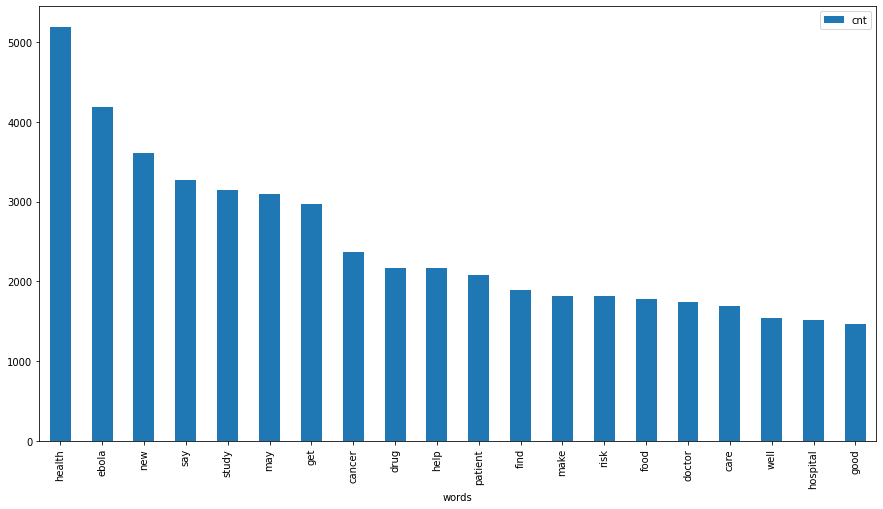

In [67]:
word_count_df_20.plot(kind='bar',x='words',y='cnt',figsize=(15,8))

### Bag of words

In [68]:
#Bag of words vector initililization
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(
                            ngram_range=(1, 3),
                            analyzer='word',
                            strip_accents = 'unicode',
                            min_df=100
                            )
bow = count_vect.fit_transform(list_of_strings)
bow.shape

(62816, 945)

In [69]:
# to understand what kind of words generated as columns by BOW
terms = count_vect.get_feature_names_out()

In [70]:
#first 10 columns generated by BOW
terms[1:10]

array(['abortion', 'abuse', 'aca', 'access', 'act', 'action', 'activity',
       'actually', 'ad'], dtype=object)

### TFIDF

In [71]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
                            ngram_range=(1,3),
                            analyzer='word',
                            strip_accents = 'unicode',
                            min_df=100
                            )
tfidf = tfidf_vect.fit_transform(list_of_strings)
tfidf.shape

(62816, 945)

In [72]:
# to understand what kind of words generated as columns by BOW
terms1 = tfidf_vect.get_feature_names_out()

In [73]:
terms1[1:10]

array(['abortion', 'abuse', 'aca', 'access', 'act', 'action', 'activity',
       'actually', 'ad'], dtype=object)

### D2V

In [74]:
#D2V_vect = Doc2Vec(list_of_strings, vector_size=DIM_SIZE, window=4, min_count=1, workers=8).dv.vectors

### K means using bag of words

#### number of clusters

In [75]:
clusters = 5

In [76]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = clusters,init='k-means++', random_state=99)
model.fit(bow)

KMeans(n_clusters=5, random_state=99)

In [77]:
labels_k_bow = model.labels_
cluster_center=model.cluster_centers_

In [78]:
cluster_center

array([[0.00184388, 0.0021512 , 0.00046097, ..., 0.0043024 , 0.00184388,
        0.00153657],
       [0.00080483, 0.00140845, 0.00181087, ..., 0.00442656, 0.00120724,
        0.00140845],
       [0.00419366, 0.00453154, 0.0026434 , ..., 0.0084867 , 0.00170927,
        0.00172914],
       [0.        , 0.        , 0.        , ..., 0.02896725, 0.        ,
        0.00251889],
       [0.        , 0.        , 0.        , ..., 0.00434783, 0.        ,
        0.        ]])

In [80]:
print(labels_k_bow)

[2 2 2 ... 2 2 2]


In [81]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels_k_bow, metric='euclidean')

In [82]:
# which tells us that clusters are far away from each other 
silhouette_score

0.060158327586473215

In [83]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names_out()
for i in range(clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: ebola
 say
 study
 patient
 new
 study say
 case
 outbreak
 doctor
 ebola patient
 hospital
 africa
 cdc
 liberia
 leone
 drug
 sierra
 sierra leone
 vaccine
 ebola outbreak
Cluster 1: health
 care
 law
 health law
 health care
 insurance
 mental
 mental health
 health insurance
 new
 exchange
 plan
 get
 say
 ebola
 report
 worker
 may
 state
 good
Cluster 2: may
 new
 study
 get
 cancer
 drug
 help
 find
 food
 make
 risk
 patient
 well
 doctor
 healthy
 good
 way
 hospital
 woman
 kid
Cluster 3: healthtalk
 everydayhealth
 eatsmartbd
 join
 food
 heart
 psoriasis
 et
 healthy
 today
 chat
 get
 eat
 follow
 go
 make
 question
 love
 diabetes
 good
Cluster 4: old
 new
 age
 old age
 new old
 new old age
 blog
 age blog
 old age blog
 care
 patient
 home
 dementia
 medicare
 hospital
 study
 may
 elderly
 doctor
 pay


### K means using TFIDF

In [84]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = clusters, random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=5, random_state=99)

In [85]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [86]:
cluster_center_tf

array([[2.21088516e-03, 2.27397208e-03, 1.37821360e-03, ...,
        3.97444159e-03, 9.04598982e-04, 9.62505712e-04],
       [9.16871512e-05, 1.57236993e-03, 1.51982054e-03, ...,
        1.56484160e-03, 1.28796857e-03, 1.77963585e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.98173073e-04, 2.67894670e-04, 1.41641524e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.03916175e-03, 5.92586804e-04, 0.00000000e+00],
       [2.58643454e-03, 1.74019422e-03, 5.69314100e-04, ...,
        9.20623273e-04, 8.94728919e-04, 9.89945061e-04]])

In [87]:
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [88]:
silhouette_score_tf

0.012701669180307722

In [89]:
#Refrence credit - to find the top 10 features of cluster centriod
#https://stackoverflow.com/questions/47452119/kmean-clustering-top-terms-in-cluster
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: health
 get
 say
 cancer
 food
 make
 drug
 help
 doctor
 care
Cluster 1: may
 study
 study find
 find
 risk
 study say
 say
 help
 may help
 cancer
Cluster 2: ebola
 ebola patient
 liberia
 patient
 outbreak
 ebola outbreak
 africa
 say
 case
 leone
Cluster 3: well
 ask
 doctor
 cancer
 may
 exercise
 risk
 think
 live
 like
Cluster 4: new
 new york
 york
 old
 health
 new old
 new old age
 old age
 drug
 age


### DBSCAN using bag of words

In [90]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [91]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 50

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Compute DBSCAN
db_bow = DBSCAN(eps=epsilon, min_samples=min_samples).fit(bow)
labels_dbscan_bow = db_bow.labels_

no_clusters = len(np.unique(labels_dbscan_bow) )
no_noise = np.sum(np.array(labels_dbscan_bow) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 8
Estimated no. of noise points: 51531


### DBSCAN using TFIDF

In [92]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)
epsilon = 1.0
min_samples = 50

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

# Compute DBSCAN
db_tfidf = DBSCAN(eps=epsilon, min_samples=min_samples).fit(tfidf)
labels_dbscan_tfidf = db_tfidf.labels_

no_clusters = len(np.unique(labels_dbscan_tfidf) )
no_noise = np.sum(np.array(labels_dbscan_tfidf) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 509


### Processed text column and clusters in DataFrame - based on K means clustering using BOW

In [93]:
list_of_strings[:10]

['breast cancer risk test devise',
 'workload harm care bma poll',
 'short people heart risk great',
 'new approach hiv promising',
 'coalition undermine doctor',
 'review case manager',
 'day empty go',
 'overhaul need endoflife care',
 'care die need overhaul',
 'labour tory key policy']

In [94]:
# processed text column from list of strings to list of lists
list_of_list_clusters = []

for element in list_of_strings:
    list_1 = []
    list_1.append(element)
    list_of_list_clusters.append(list_1)
    list_1 = []
print(list_of_list_clusters[:10])

[['breast cancer risk test devise'], ['workload harm care bma poll'], ['short people heart risk great'], ['new approach hiv promising'], ['coalition undermine doctor'], ['review case manager'], ['day empty go'], ['overhaul need endoflife care'], ['care die need overhaul'], ['labour tory key policy']]


In [95]:
len(labels_k_bow)

62816

In [96]:
len(labels_tf)

62816

In [97]:
labels_k_bow = labels_k_bow.tolist()
type(labels_k_bow[0])

int

In [98]:
labels_k_bow[:10]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [99]:
# processed clusters label from list of integers to list of lists
list_of_lists_labels = []

for element in labels_k_bow:
    list_1 = []
    list_1.append(element)
    list_of_lists_labels.append(list_1)
    list_1 = []
print(list_of_lists_labels[:10])

[[2], [2], [2], [2], [2], [2], [2], [2], [2], [2]]


In [100]:
tweets_clustered = pd.DataFrame(list_of_list_clusters)
tweets_clustered.rename(columns = {0:'Tweets_cleaned'}, inplace = True)
tweets_clustered[:10]

,Tweets_cleaned
0,breast cancer risk test devise
1,workload harm care bma poll
2,short people heart risk great
3,new approach hiv promising
4,coalition undermine doctor
5,review case manager
6,day empty go
7,overhaul need endoflife care
8,care die need overhaul
9,labour tory key policy


In [102]:
clusters = pd.DataFrame(list_of_lists_labels)
clusters.rename(columns = {0:'Cluster_labels'}, inplace = True)
clusters[:10]

,Cluster_labels
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [103]:
# merging text column and clusters lables
text_clusters = pd.concat([tweets_clustered,clusters], axis=1)

In [104]:
text_clusters

,Tweets_cleaned,Cluster_labels
0,breast cancer risk test devise,2
1,workload harm care bma poll,2
2,short people heart risk great,2
3,new approach hiv promising,2
4,coalition undermine doctor,2
...,...,...
62811,expect work better year,2
62812,shortens insurance application,2
62813,test confidential,2
62814,delay web host switch,2


# merge with the initial dataframe twitter_health

In [105]:
# cheking the lenght before merge
print('Initial DataFrame shape:', twitter_health.shape)
print('Text and clusters labels DataFrame shape:', text_clusters.shape)
assert len(twitter_health) == len(text_clusters)

Initial DataFrame shape: (62816, 5)
Text and clusters labels DataFrame shape: (62816, 2)


In [106]:
tweets_clustered = pd.concat([twitter_health, text_clusters], axis=1)

# clustered DATAFRAME for further tweets analysis

In [107]:
tweets_clustered[:10]

,Number,Date_Time,info,source,Core_info_final,Tweets_cleaned,Cluster_labels
0,5.859784e+17,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised,breast cancer risk test devise,2.0
1,5.859478e+17,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll,workload harm care bma poll,2.0
2,5.859478e+17,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater',short people heart risk great,2.0
3,5.858661e+17,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising',new approach hiv promising,2.0
4,5.857941e+17,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors,coalition undermine doctor,2.0
5,5.857335e+17,Wed Apr 08 09:18:39 +0000 2015,Review of case against NHS manager http://bbc....,bbchealth,Review of case against NHS manager,review case manager,2.0
6,5.857335e+17,Wed Apr 08 09:18:39 +0000 2015,"VIDEO: 'All day is empty, what am I going to d...",bbchealth,"VIDEO: 'All day is empty, what am I going to d...",day empty go,2.0
7,5.857016e+17,Wed Apr 08 07:11:58 +0000 2015,VIDEO: 'Overhaul needed' for end-of-life care ...,bbchealth,VIDEO: 'Overhaul needed' for end-of-life care,overhaul need endoflife care,2.0
8,5.856208e+17,Wed Apr 08 01:51:00 +0000 2015,Care for dying 'needs overhaul' http://bbc.in/...,bbchealth,Care for dying 'needs overhaul',care die need overhaul,2.0
9,5.854373e+17,Tue Apr 07 13:41:42 +0000 2015,VIDEO: NHS: Labour and Tory key policies http:...,bbchealth,VIDEO: NHS: Labour and Tory key policies,labour tory key policy,2.0


In [108]:
from datetime import date

In [109]:
tweets_clustered['Date_Time'] = pd.to_datetime(tweets_clustered['Date_Time'], errors='coerce')
tweets_clustered['year'] = tweets_clustered['Date_Time'].dt.year
tweets_clustered['month'] = tweets_clustered['Date_Time'].dt.month
tweets_clustered['day'] = tweets_clustered['Date_Time'].dt.day
tweets_clustered['date'] = tweets_clustered['Date_Time'].dt.date

In [110]:
tweets_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62817 entries, 0 to 62816
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Number           62816 non-null  float64            
 1   Date_Time        62816 non-null  datetime64[ns, UTC]
 2   info             62816 non-null  object             
 3   source           62816 non-null  object             
 4   Core_info_final  62816 non-null  object             
 5   Tweets_cleaned   62816 non-null  object             
 6   Cluster_labels   62816 non-null  float64            
 7   year             62816 non-null  float64            
 8   month            62816 non-null  float64            
 9   day              62816 non-null  float64            
 10  date             62816 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 5.8+ MB


In [111]:
tweets_clustered['date'] = pd.to_datetime(tweets_clustered['date'], errors='coerce')
tweets_clustered['day_of_week'] = tweets_clustered['date'].apply(lambda time: time.dayofweek)

In [191]:
tweets_clustered

,Number,Date_Time,info,source,Core_info_final,Tweets_cleaned,Cluster_labels,year,month,day,date,day_of_week
0,5.859784e+17,2015-04-09 01:31:50+00:00,Breast cancer risk test devised http://bbc.in/...,bbchealth,Breast cancer risk test devised,breast cancer risk test devise,2.0,2015.0,4.0,9.0,2015-04-09,3.0
1,5.859478e+17,2015-04-08 23:30:18+00:00,GP workload harming care - BMA poll http://bbc...,bbchealth,GP workload harming care - BMA poll,workload harm care bma poll,2.0,2015.0,4.0,8.0,2015-04-08,2.0
2,5.859478e+17,2015-04-08 23:30:18+00:00,Short people's 'heart risk greater' http://bbc...,bbchealth,Short people's 'heart risk greater',short people heart risk great,2.0,2015.0,4.0,8.0,2015-04-08,2.0
3,5.858661e+17,2015-04-08 18:05:28+00:00,New approach against HIV 'promising' http://bb...,bbchealth,New approach against HIV 'promising',new approach hiv promising,2.0,2015.0,4.0,8.0,2015-04-08,2.0
4,5.857941e+17,2015-04-08 13:19:33+00:00,Coalition 'undermined NHS' - doctors http://bb...,bbchealth,Coalition 'undermined NHS' - doctors,coalition undermine doctor,2.0,2015.0,4.0,8.0,2015-04-08,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
62811,4.154945e+17,2013-12-24 14:49:47+00:00,RT @timothywmartin: Every health insurer I spo...,wsjhealth,RT @timothywmartin: Every health insurer I spo...,expect work better year,2.0,2013.0,12.0,24.0,2013-12-24,1.0
62812,4.154943e+17,2013-12-24 14:48:45+00:00,RT @stefaniei: Addiction and the brain: scient...,wsjhealth,RT @stefaniei: Addiction and the brain: scient...,shortens insurance application,2.0,2013.0,12.0,24.0,2013-12-24,1.0
62813,4.154934e+17,2013-12-24 14:45:09+00:00,RT @timothywmartin: Ho-ho-hold up! A surprise ...,wsjhealth,RT @timothywmartin: Ho-ho-hold up! A surprise ...,test confidential,2.0,2013.0,12.0,24.0,2013-12-24,1.0
62814,4.154932e+17,2013-12-24 14:44:33+00:00,RT @stefaniei: Health-Insurance Deadline Exten...,wsjhealth,RT @stefaniei: Health-Insurance Deadline Exten...,delay web host switch,2.0,2013.0,12.0,24.0,2013-12-24,1.0


In [112]:
twitter_weekdays = tweets_clustered['day_of_week'].value_counts()
df_weekdays = pd.DataFrame(data=twitter_weekdays)
df_weekdays['Weekday'] = df_weekdays.index
df_weekdays.sort_values('Weekday')

,day_of_week,Weekday
0.0,10550,0.0
1.0,11690,1.0
2.0,11569,2.0
3.0,12256,3.0
4.0,10329,4.0
5.0,3779,5.0
6.0,2643,6.0


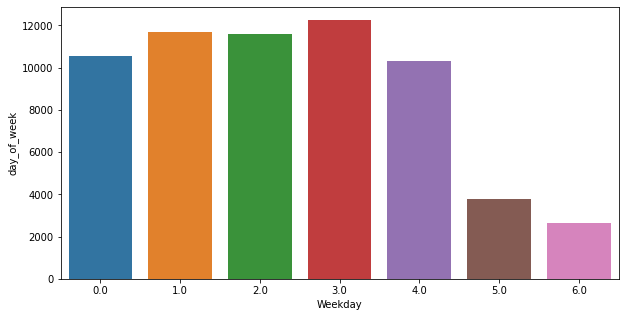

In [113]:
plt.figure(figsize = (10,5))
sns.barplot(y ='day_of_week', x = 'Weekday', data = df_weekdays)
plt.show()

### Conclusion: Most of the tweets are released during workdays (3 to 4 times more on workdays than during weekend days)

In [114]:
weekly_by_source = tweets_clustered.groupby(['source', 'day_of_week']).count()

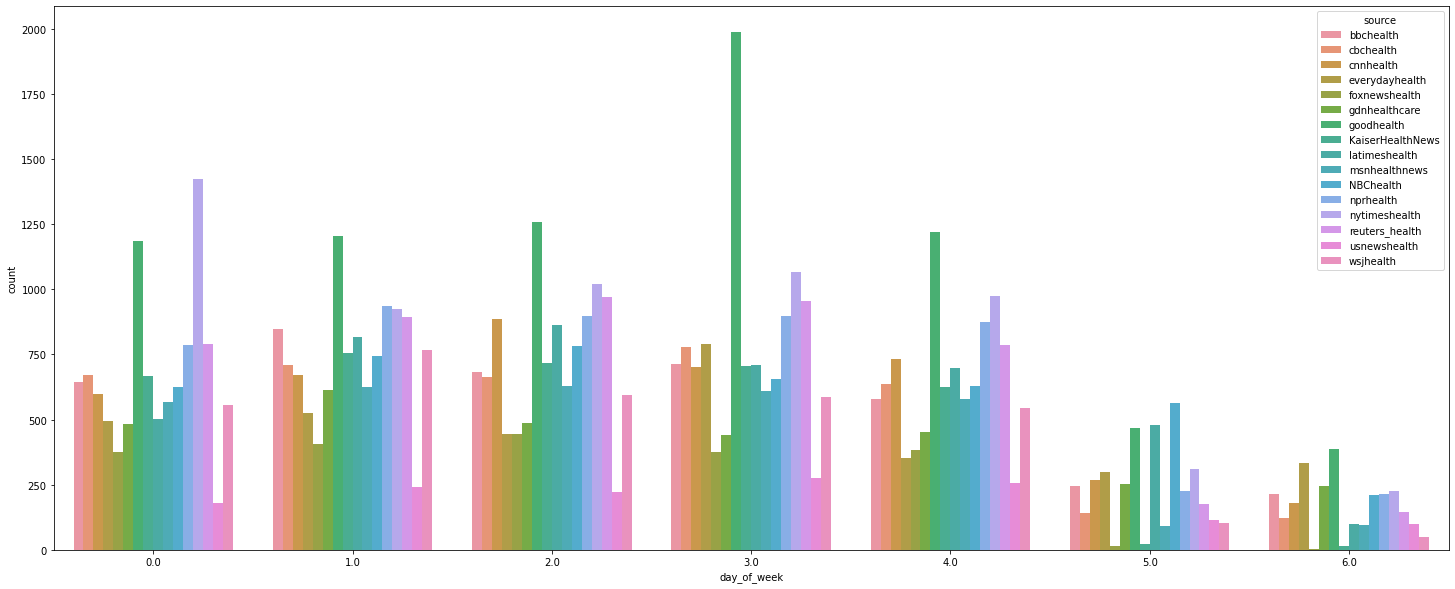

In [115]:
#weekly_by_source
plt.figure(figsize = (25,10))
sns.countplot(x ='day_of_week', hue = "source", data = tweets_clustered)
plt.show()

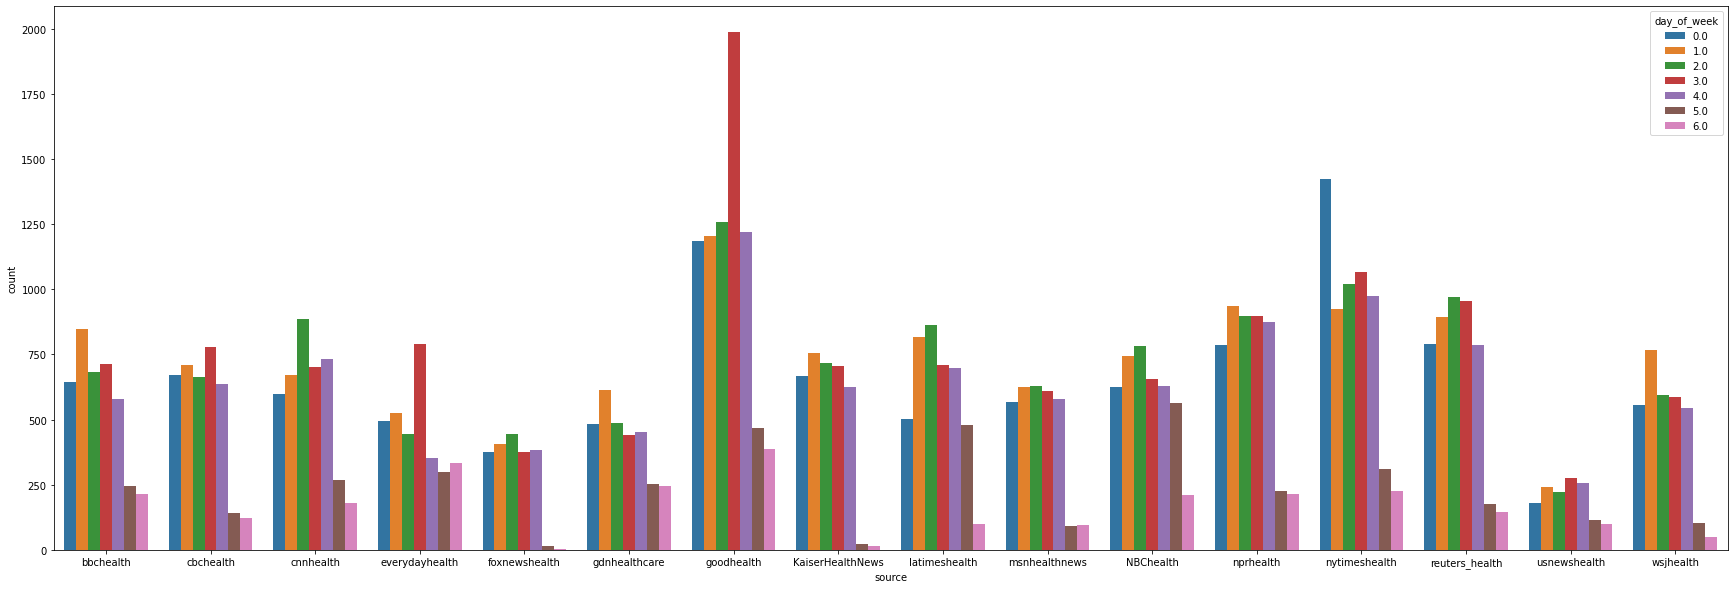

In [116]:
plt.figure(figsize = (30,10))
sns.countplot(x ='source', hue = "day_of_week", data = tweets_clustered)
plt.show()

In [117]:
tweets_clustered['Cluster_labels'].value_counts()

2.0    50314
0.0     6508
1.0     4970
3.0      794
4.0      230
Name: Cluster_labels, dtype: int64

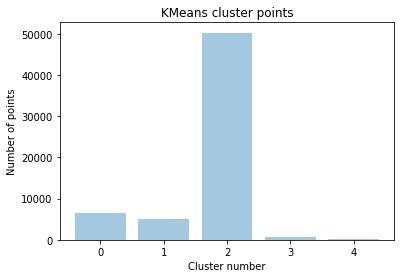

In [118]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(5)], tweets_clustered.groupby(['Cluster_labels'])['source'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [193]:
tweets_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62816 entries, 0 to 62815
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Number           62815 non-null  float64            
 1   Date_Time        62815 non-null  datetime64[ns, UTC]
 2   info             62815 non-null  object             
 3   source           62815 non-null  object             
 4   Core_info_final  62815 non-null  object             
 5   Tweets_cleaned   62816 non-null  object             
 6   Cluster_labels   62816 non-null  float64            
 7   year             62815 non-null  float64            
 8   month            62815 non-null  float64            
 9   day              62815 non-null  float64            
 10  date             62815 non-null  datetime64[ns]     
 11  day_of_week      62815 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), object(4)
memory

In [190]:
tweets_clustered['year'].value_counts().sort_index()

2011.0     2303
2012.0     5797
2013.0    18905
2014.0    25995
2015.0     9815
Name: year, dtype: int64

In [204]:
year_dayofweek = tweets_clustered.groupby(['year','day_of_week']).size().sort_values(ascending=False).reset_index(name='count') 

In [217]:
year_dayofweek

,year,day_of_week,count
0,2014.0,3.0,4986
1,2014.0,1.0,4983
2,2014.0,2.0,4892
3,2014.0,0.0,4470
4,2014.0,4.0,4315
5,2013.0,3.0,3584
6,2013.0,1.0,3427
7,2013.0,2.0,3399
8,2013.0,0.0,3264
9,2013.0,4.0,2916


<Figure size 3600x1800 with 0 Axes>

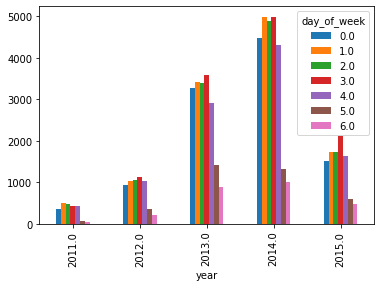

In [225]:
plt.figure(figsize = (50,25))
pd.pivot_table(year_dayofweek, index='year', columns=['day_of_week'], values='count', aggfunc='sum').plot.bar()
plt.show()

### Word cloud

In [ ]:
#!pip install pillow

In [ ]:
#!pip install wordcloud

In [119]:
from wordcloud import WordCloud, STOPWORDS

In [120]:
tweets_clustered.shape

(62817, 12)

In [121]:
tweets_clustered['Tweets_cleaned'].isna().sum()

1

In [122]:
tweets_clustered.loc[tweets_clustered['Tweets_cleaned'].isna()]

,Number,Date_Time,info,source,Core_info_final,Tweets_cleaned,Cluster_labels,year,month,day,date,day_of_week
62816,4.153618e+17,2013-12-24 06:02:16+00:00,"For Desperate Family in India, a Ray of Hope F...",wsjhealth,"For Desperate Family in India, a Ray of Hope F...",NaN,NaN,2013.0,12.0,24.0,2013-12-24,1.0


In [123]:
tweets_clustered.dropna(subset=['Tweets_cleaned'], inplace=True)

In [124]:
tweets_clustered.shape

(62816, 12)

In [181]:
tweets_clustered.to_csv("tweets_clustered.csv")  

In [125]:
#Creating the text variable
text = " ".join(cat for cat in tweets_clustered.Tweets_cleaned)

In [126]:
# Generate word cloud
word_cloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="salmon",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text)

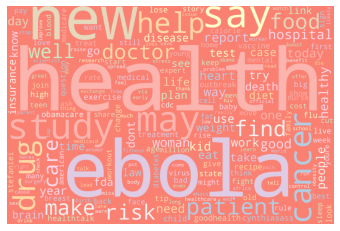

In [127]:
# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [227]:
tweets_2011 = tweets_clustered[tweets_clustered['year'] == 2011]
tweets_2012 = tweets_clustered[tweets_clustered['year'] == 2012]
tweets_2013 = tweets_clustered[tweets_clustered['year'] == 2013]
tweets_2014 = tweets_clustered[tweets_clustered['year'] == 2014]
tweets_2015 = tweets_clustered[tweets_clustered['year'] == 2015]

In [228]:
text_2011 = " ".join(cat for cat in tweets_2011.Tweets_cleaned)
text_2012 = " ".join(cat for cat in tweets_2012.Tweets_cleaned)
text_2013 = " ".join(cat for cat in tweets_2013.Tweets_cleaned)
text_2014 = " ".join(cat for cat in tweets_2014.Tweets_cleaned)
text_2015 = " ".join(cat for cat in tweets_2015.Tweets_cleaned)

In [229]:
# Generate word cloud
word_cloud_2011 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="yellow",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_2011)

In [230]:
# Generate word cloud
word_cloud_2012 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="orange",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_2012)

In [163]:
# Generate word cloud
word_cloud_2013 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="red",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_2013)

In [164]:
word_cloud_2014 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="blue",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_2014)

In [165]:
word_cloud_2015 = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="green",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_2015)

Top words in 2011


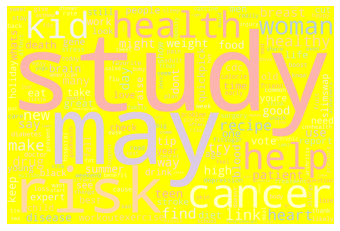

In [231]:
# Display the generated Word Cloud
print('Top words in 2011')
plt.imshow(word_cloud_2011)
plt.axis("off")
plt.show()

Top words in 2012


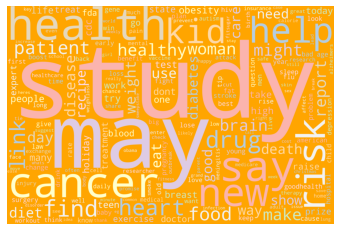

In [232]:
# Display the generated Word Cloud
print('Top words in 2012')
plt.imshow(word_cloud_2012)
plt.axis("off")
plt.show()

Top words in 2013


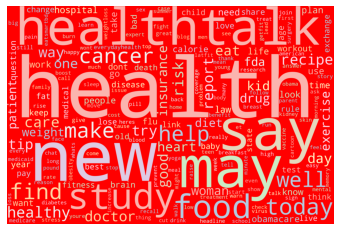

In [166]:
# Display the generated Word Cloud
print('Top words in 2013')
plt.imshow(word_cloud_2013)
plt.axis("off")
plt.show()

Top words in 2014


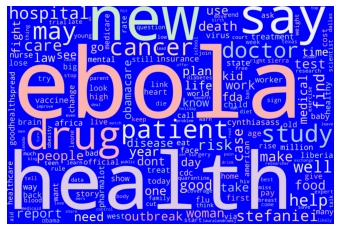

In [167]:
# Display the generated Word Cloud
print('Top words in 2014')
plt.imshow(word_cloud_2014)
plt.axis("off")
plt.show()

Top words in 2015


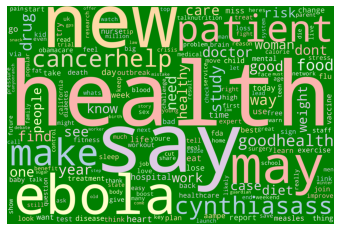

In [168]:
# Display the generated Word Cloud
print('Top words in 2015')
plt.imshow(word_cloud_2015)
plt.axis("off")
plt.show()

In [175]:
tweets_goodhealth = tweets_clustered[tweets_clustered['source'] == 'goodhealth']

In [171]:
#tweets_goodhealth

In [176]:
text_goodhealth = " ".join(cat for cat in tweets_goodhealth.Tweets_cleaned)

In [177]:
# Generate word cloud
word_cloud_goodhealth = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color="red",
    colormap="Pastel1",
    collocations=False,
    stopwords=STOPWORDS,
    ).generate(text_goodhealth)

Top words in goodhealth


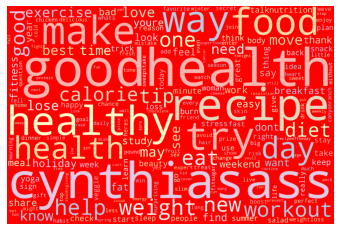

In [178]:
# Display the generated Word Cloud
print('Top words in goodhealth')
plt.imshow(word_cloud_goodhealth)
plt.axis("off")
plt.show()

In [182]:
def jaccard_similarity(x,y):
    #""" returns the jaccard similarity between two lists """
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

In [183]:
sentences = ["The bottle is empty",
"There is nothing in the bottle"]
sentences = [sent.lower().split(" ") for sent in sentences]
jaccard_similarity(sentences[0], sentences[1])

0.42857142857142855